### SIMD Modeling 

First model idea is to include the rural/urban rating of each area to see what accuracy a model could learn to classifiy from the SIMD data. A high accuracy would indicate if how rural an area is influences the recognised indicators of deprivation. The goal here is not a predictive model. If a predictive model performs well enough then trained on all DZ zones the resulting predictions will follow general rules. Areas that the model gets wrong will give a list that buck trends. Filtering that list by deprevation rank could give some area that could be further investigated to see why they don't seem to follow the rules. This could influence policy desitions to help uplift deprived areas.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#plt.style.use('ggplot') # To look more like r stuff
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import folium
#from folium import Choropleth
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection, metrics
import copy


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'data/'

In [3]:
# importing data to geopandas
gdf = gpd.read_file(path+"SIMD.gpkg").set_index('Data_Zone')

In [4]:
# importing data to pandas
df = pd.read_csv(path+"rural_urban.csv")

In [5]:
SIMD_rural_full = pd.merge(gdf, df, left_on='DZName', right_on='Reference Area')
SIMD_rural_full.columns

Index(['DZName', 'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2',
       'Shape_Leng', 'Shape_Area', 'Intermediate_Zone', 'Council_area',
       'Total_population', 'Working_age_population', 'SIMD2020v2_Rank',
       'SIMD2020v2_Income_Domain_Rank', 'SIMD2020_Employment_Domain_Rank',
       'SIMD2020_Health_Domain_Rank', 'SIMD2020_Education_Domain_Rank',
       'SIMD2020_Access_Domain_Rank', 'SIMD2020_Crime_Domain_Rank',
       'SIMD2020_Housing_Domain_Rank', 'Income_rate', 'Income_count',
       'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR',
       'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'no_qualifications', 'not_participating', 'University', 'drive_petrol',
       'drive_GP', 'drive_post', 'drive_primary', 'drive_retail',
       'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail', 'Broadband',
       'crime_count', 'crime_rate', 'overcrowded_count', 'nocentralheat_count',
       'overcrowded_rate', 'nocentralheat_rate', 'geometry', '

In [6]:
means = SIMD_rural_full.groupby('Rank_2016').mean()

In [7]:
means

Quintilev2  Decilev2  Vigintilv2  Percentv2    Shape_Leng  \
Rank_2016                                                              
1            2.963482  5.428025   10.353291  49.808917   2998.312493   
2            2.813208  5.102642    9.696604  46.472453   3948.538360   
3            3.239482  6.017799   11.564725  55.843042   5934.286022   
4            2.859922  5.198444    9.867704  47.221790   6651.185277   
5            3.438710  6.420645   12.345806  59.668387  28998.984789   
6            3.234192  5.964871   11.454333  55.309133  87324.479658   

             Shape_Area  Total_population  Working_age_population  \
Rank_2016                                                           
1          3.685057e+05        822.385563              563.469639   
2          7.307080e+05        751.470566              477.059623   
3          2.180844e+06        767.127832              473.888350   
4          2.304041e+06        745.124514              443.175097   
5          2.806739e+07        779.476129              482.983226   
6          1.206309e+08        740.414520              440.295082   

           SIMD2020v2_Rank  SIMD2020v2_Income_Domain_Rank  ...      PT_GP  \
Rank_2016                                                  ...              
1              3440.377919                    3337.923142  ...   7.945145   
2              3206.804528                    3199.167736  ...  10.030751   
3              3859.747573                    3749.287217  ...   8.739338   
4              3260.062257                    3130.535019  ...   9.395427   
5              4128.011613                    4440.960000  ...  16.046051   
6              3822.847775                    4137.307963  ...  19.541127   

             PT_post  PT_retail  Broadband  crime_count  crime_rate  \
Rank_2016                                                             
1           7.520039  10.070614   1.947275    31.847790  386.427261   
2           8.661399  12.192035   2.509555    25.344762  338.570115   
3           7.583800  11.784689   4.598818    16.984345  224.327012   
4           7.693633   8.550214   6.083947    21.460129  301.209209   
5          12.173841  21.825315  26.999959    13.166967  169.874095   
6          13.692086  30.739291  36.980884    10.374493  142.525858   

           overcrowded_count  nocentralheat_count  overcrowded_rate  \
Rank_2016                                                             
1                 122.232696            21.039490         15.882696   
2                  74.131321             7.036226         10.076554   
3                  59.765372             6.770227          8.036179   
4                  64.143969            11.564202          8.726948   
5                  43.116129            13.025806          5.923714   
6                  41.426230            25.896956          5.678255   

           nocentralheat_rate  
Rank_2016                      
1                    2.723718  
2                    0.961209  
3                    0.905988  
4                    1.627675  
5                    1.812780  
6                    3.619545  

[6 rows x 48 columns]

In [8]:
medians = SIMD_rural_full.groupby('Rank_2016').median()
medians

Quintilev2  Decilev2  Vigintilv2  Percentv2    Shape_Leng  \
Rank_2016                                                              
1                 3.0       5.0        10.0       48.0   2413.382812   
2                 3.0       5.0         9.0       42.0   2753.094971   
3                 3.0       6.0        12.0       56.0   3308.066406   
4                 3.0       5.0        10.0       48.0   3825.928955   
5                 4.0       7.0        13.0       62.0  23500.843750   
6                 3.0       6.0        12.0       56.0  59886.109375   

             Shape_Area  Total_population  Working_age_population  \
Rank_2016                                                           
1          1.515354e+05             799.0                   529.0   
2          1.914795e+05             732.0                   459.0   
3          2.305958e+05             744.0                   452.0   
4          2.975206e+05             721.0                   431.0   
5          1.190914e+07             749.0                   466.0   
6          5.310488e+07             729.0                   432.0   

           SIMD2020v2_Rank  SIMD2020v2_Income_Domain_Rank  ...      PT_GP  \
Rank_2016                                                  ...              
1                   3309.0                         3256.0  ...   7.375080   
2                   2896.0                         2906.5  ...   9.360719   
3                   3902.0                         3687.0  ...   7.839120   
4                   3297.0                         3065.0  ...   8.521877   
5                   4273.0                         4612.0  ...  15.623240   
6                   3897.0                         4265.0  ...  18.155081   

             PT_post  PT_retail  Broadband  crime_count  crime_rate  \
Rank_2016                                                             
1           7.048628   9.451055   0.000000    21.274063  264.404541   
2           7.996038  11.613586   0.000000    17.138012  234.357697   
3           6.776276   9.671248   0.232020    13.036455  174.107651   
4           7.491967   8.095119   0.459770    16.312541  217.819214   
5          10.929035  21.076031  18.527315     9.273606  128.562531   
6          12.862743  23.307634  35.816620     8.123247  104.334488   

           overcrowded_count  nocentralheat_count  overcrowded_rate  \
Rank_2016                                                             
1                      112.0                 13.0         15.233786   
2                       68.0                  4.0          9.581693   
3                       53.5                  5.0          7.489985   
4                       61.0                  9.0          8.142493   
5                       36.0                 10.0          5.017921   
6                       37.0                 23.0          5.256410   

           nocentralheat_rate  
Rank_2016                      
1                    1.768868  
2                    0.622375  
3                    0.656456  
4                    1.200873  
5                    1.488095  
6                    3.149606  

[6 rows x 48 columns]

Dealing with Nans

Going with the median but may need to change this to after test/train split, or in kfold pipline to avoid any data leak.

In [9]:
SIMD_rural_full_noNans = SIMD_rural_full.fillna(SIMD_rural_full.median())

In [10]:
# Some columns dropped that wouldn't be helpful (or too helpful) for model

dropped_cols = ['DZName', 'Intermediate_Zone', 'Council_area', 'Reference Area', 'geometry']

SIMD_rural = SIMD_rural_full_noNans.drop(dropped_cols,axis=1)

In [11]:
# Set target column name
target = 'Rank_2016'

# Changing classifaction form 1-6 to 0-5 (Can be changed back later, or just add one in your head)
SIMD_rural['Rank_2016'] = SIMD_rural['Rank_2016'] - 1

# Dropping target
X = SIMD_rural.drop([target],axis=1)
y = SIMD_rural[target]

In [12]:
# List coorilations to target

corr_list = SIMD_rural[SIMD_rural.columns[:]].corr()[target][:]

def rank_plot(scores, title):
    scores = scores.sort_values(key=abs, ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores.abs())
    plt.yticks(width, ticks)
    plt.title(title)
    it = iter(range(len(scores)))
    scores.apply(lambda x: plt.text(abs(x), next(it),'{:.2f}%'.format(x * 100)))

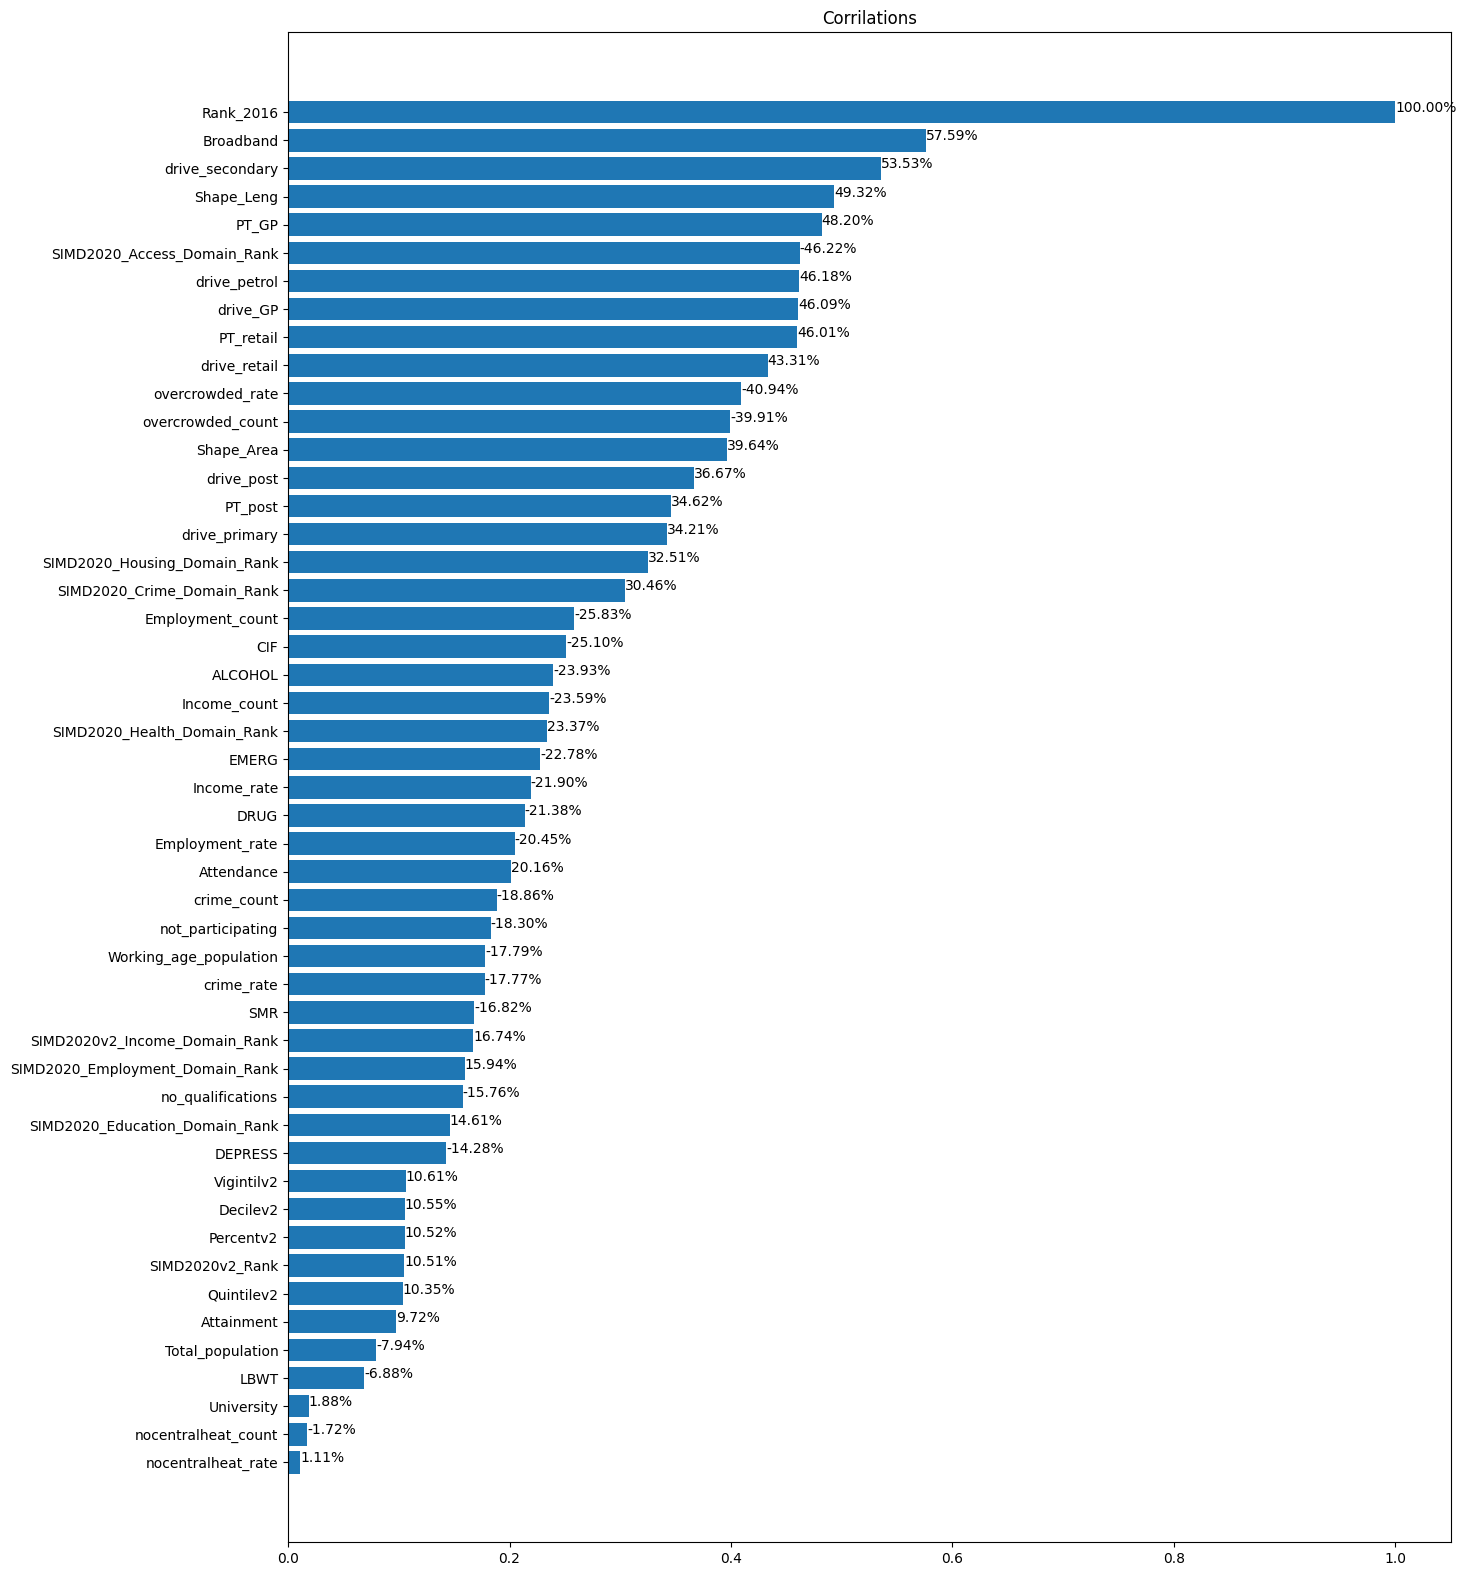

In [13]:
plt.figure(dpi=100, figsize=(15, 20))
rank_plot(corr_list, 'Corrilations')

It's perhapps no surprise that Access domain features have the highest Corrilations

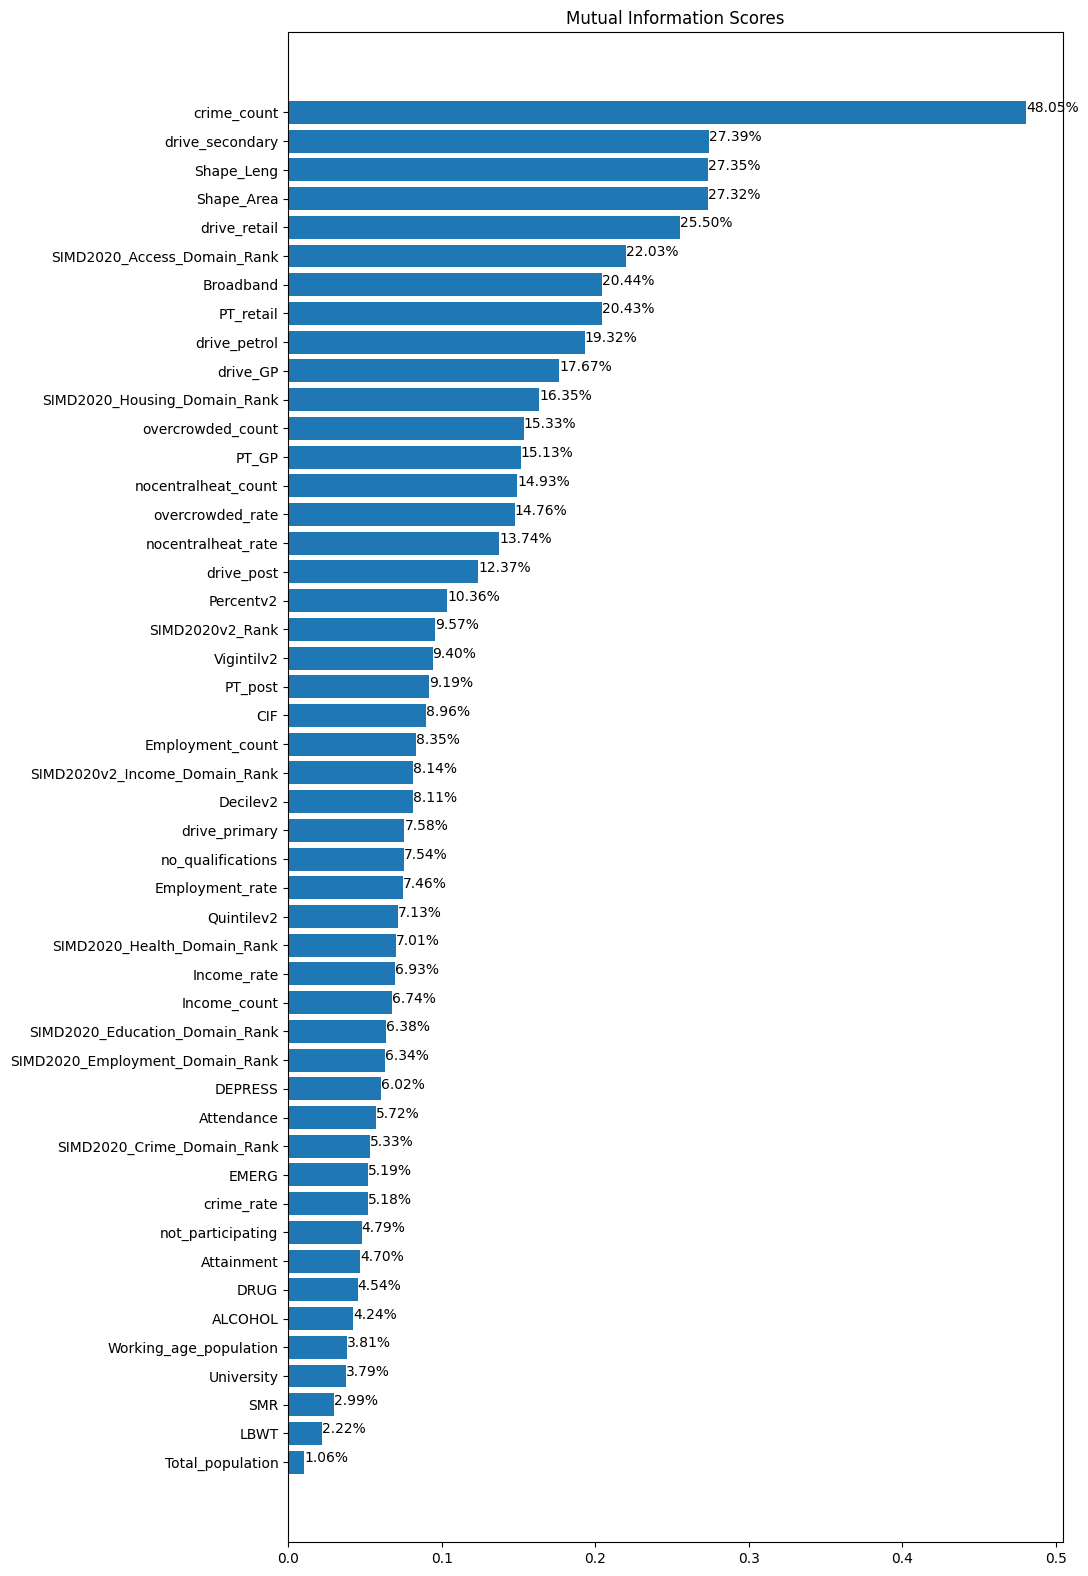

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

plt.figure(dpi=100, figsize=(10, 20))
rank_plot(mi_scores, 'Mutual Information Scores')

In [15]:
# 

from cleanlab.latent_estimation import estimate_cv_predicted_probabilities
from cleanlab.pruning import get_noise_indices

from sklearn.neural_network import MLPClassifier

# Find the indices of label errors

X_train_data = np.array(X)
train_noisy_labels = np.array(y)

probabilities = estimate_cv_predicted_probabilities(
    X_train_data, 
    train_noisy_labels, 
    clf=MLPClassifier(),
)
label_error_indices = get_noise_indices(
    s = train_noisy_labels, 
    psx = probabilities, 
)

count = np.count_nonzero(label_error_indices)

print('No. of possible false labels: ', count)
print('Percent of possible false labels: ',count/X.shape[0])

No. of possible false labels:  3984
Percent of possible false labels:  0.5625529511437447


Some causal analysis. A model could be built from this but run more out of intrest to see if it picks up on relationships that fit domian knowledge.

In [16]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
#from IPython.display import Image
sm = StructureModel()

In [17]:
# Causal discovery 

sm = from_pandas(X, tabu_parent_nodes = [('Quintilev2'), ('Decilev2'), ('Vigintilv2'), ('Percentv2'), ('SIMD2020v2_Rank'), ('SIMD2020v2_Income_Domain_Rank'),
       ('SIMD2020_Employment_Domain_Rank'), ('SIMD2020_Health_Domain_Rank'), ('SIMD2020_Education_Domain_Rank'), ('SIMD2020_Access_Domain_Rank'),
       ('SIMD2020_Crime_Domain_Rank'), ('SIMD2020_Housing_Domain_Rank')], tabu_child_nodes=[('Shape_Leng'), ('Shape_Area')])

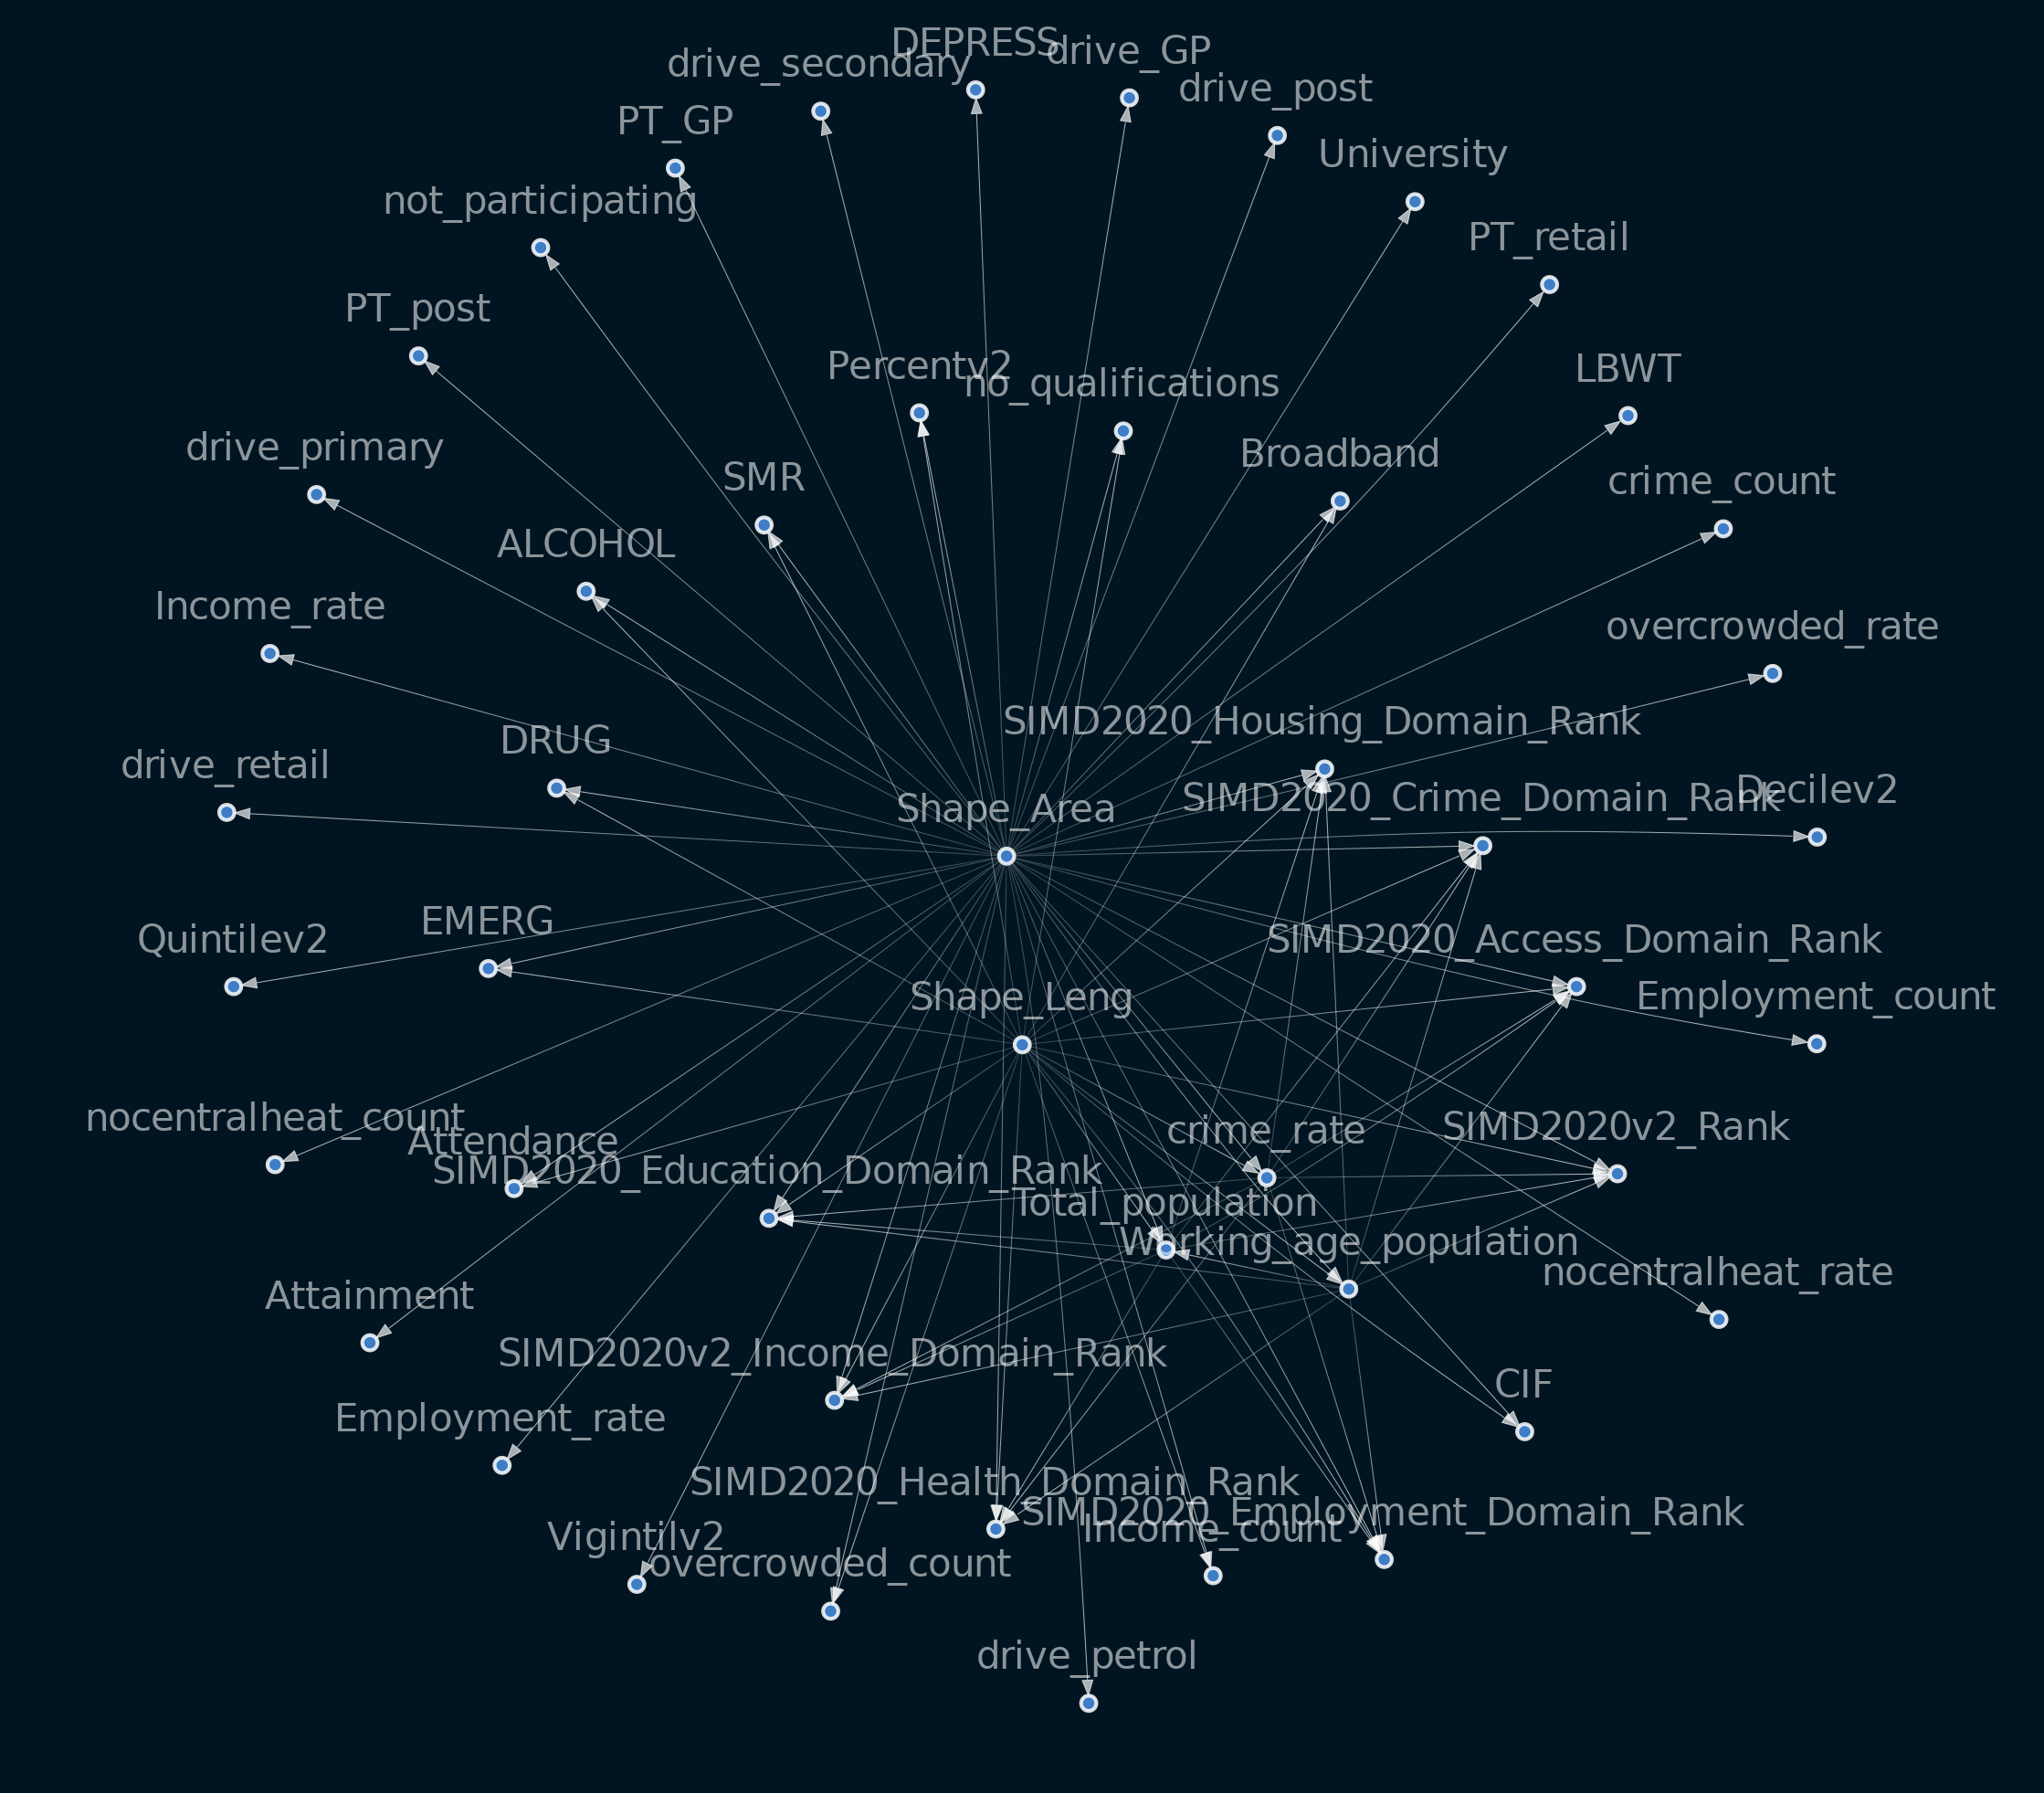

In [18]:
# Causal links can be removed from threshold or untill the graph is a DAG

sm.threshold_till_dag()
#sm.remove_edges_below_threshold(0.05)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [19]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
cols = X.columns
cols

Index(['Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'Shape_Leng',
       'Shape_Area', 'Total_population', 'Working_age_population',
       'SIMD2020v2_Rank', 'SIMD2020v2_Income_Domain_Rank',
       'SIMD2020_Employment_Domain_Rank', 'SIMD2020_Health_Domain_Rank',
       'SIMD2020_Education_Domain_Rank', 'SIMD2020_Access_Domain_Rank',
       'SIMD2020_Crime_Domain_Rank', 'SIMD2020_Housing_Domain_Rank',
       'Income_rate', 'Income_count', 'Employment_rate', 'Employment_count',
       'CIF', 'ALCOHOL', 'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG',
       'Attendance', 'Attainment', 'no_qualifications', 'not_participating',
       'University', 'drive_petrol', 'drive_GP', 'drive_post', 'drive_primary',
       'drive_retail', 'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail',
       'Broadband', 'crime_count', 'crime_rate', 'overcrowded_count',
       'nocentralheat_count', 'overcrowded_rate', 'nocentralheat_rate'],
      dtype='object')

Dealing with nans  
This is required to do at after test/test spit or info from test is include in the replacement values.

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [22]:
# Importing all required models

from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,classification_report, auc
import scikitplot as skplt

In [23]:
# Dict of models to run through and compare

models = [
    ['CatBoostClassifier: ', CatBoostClassifier(verbose=0)],
    ['KNeighborsClassifier: ', KNeighborsClassifier()],
    ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
    ['RandomForestClassifier: ', RandomForestClassifier()],
    ['LogisticRegression: ', LogisticRegression()],
    ['XGBClassifier: ', XGBClassifier(verbosity = 0)],
    ['MLPClassifier: ', MLPClassifier(max_iter=2000)]
         ]

In [24]:
# Run for CV, go walk the dog.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit

def kfoldmodel():
    cv = ShuffleSplit(n_splits=10, random_state=0)

    scoresdf = pd.DataFrame(columns = ['model', 'mean score'])

    for name,curr_model in models:
        print (name)
        pipeline = Pipeline([('scaler', scaler), ('model', curr_model)])
        scores = cross_val_score(pipeline, X, y, cv=cv)
        print("scores:", scores)
        meanscore = scores.mean()
        print("Average score: ", meanscore)
        new_row = {'model':name, 'mean score':meanscore}
        scoresdf = scoresdf.append(new_row, ignore_index=True)
    return scoresdf

kfoldmodel()

CatBoostClassifier: 
scores: [0.7348378  0.71086037 0.72919605 0.68970381 0.69816643 0.68265162
 0.72214386 0.74047955 0.71509168 0.72073343]
Average score:  0.7143864598025388
KNeighborsClassifier: 
scores: [0.6248237  0.60789845 0.64174894 0.63046544 0.60084626 0.60084626
 0.63469676 0.64315938 0.60507757 0.62200282]
Average score:  0.6211565585331452
DecisionTreeClassifier: 
scores: [0.5796897  0.51622003 0.5528914  0.55007052 0.52750353 0.5528914
 0.54866008 0.55853315 0.56981664 0.52750353]
Average score:  0.5483779971791256
RandomForestClassifier: 
scores: [0.70098731 0.65303244 0.69534556 0.67277856 0.66713681 0.65021157
 0.67559944 0.7122708  0.69534556 0.68829337]
Average score:  0.6811001410437236
LogisticRegression: 
scores: [0.66995769 0.6135402  0.6854725  0.63187588 0.64598025 0.62341326
 0.62905501 0.67136812 0.65585331 0.66995769]
Average score:  0.6496473906911142
XGBClassifier: 
scores: [0.73201693 0.69252468 0.70521862 0.68829337 0.68829337 0.67559944
 0.69816643 0.7

model  mean score
0      CatBoostClassifier:     0.714386
1    KNeighborsClassifier:     0.621157
2  DecisionTreeClassifier:     0.548378
3  RandomForestClassifier:     0.681100
4      LogisticRegression:     0.649647
5           XGBClassifier:     0.700987
6           MLPClassifier:     0.697602

CatBoostClassifier: 
Train score: 0.9849955869373345
Test score: 0.7085391672547636


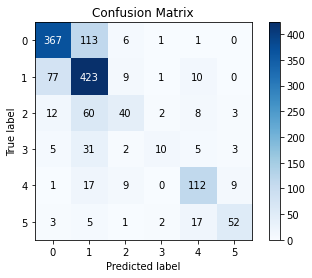

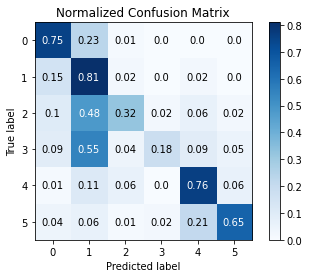

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       488
           1       0.65      0.81      0.72       520
           2       0.60      0.32      0.42       125
           3       0.62      0.18      0.28        56
           4       0.73      0.76      0.74       148
           5       0.78      0.65      0.71        80

    accuracy                           0.71      1417
   macro avg       0.70      0.58      0.61      1417
weighted avg       0.71      0.71      0.70      1417



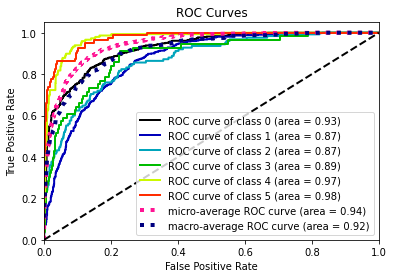

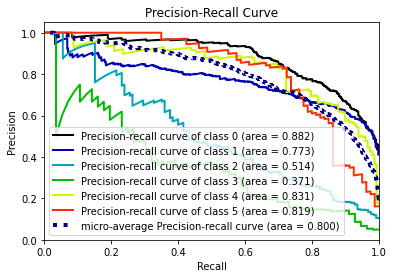

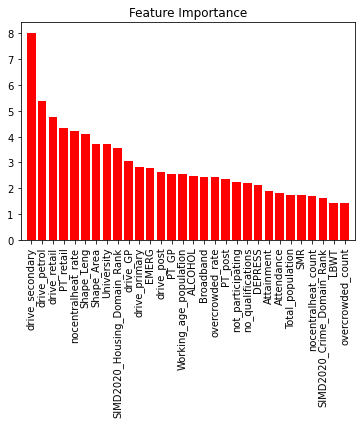

KNeighborsClassifier: 
Train score: 0.7313327449249779
Test score: 0.644318983768525


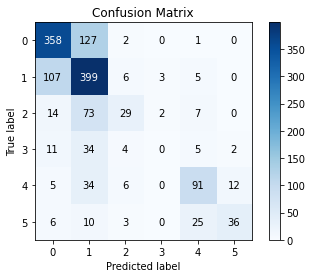

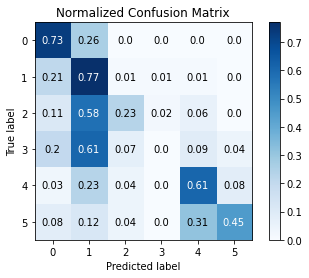

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       488
           1       0.59      0.77      0.67       520
           2       0.58      0.23      0.33       125
           3       0.00      0.00      0.00        56
           4       0.68      0.61      0.65       148
           5       0.72      0.45      0.55        80

    accuracy                           0.64      1417
   macro avg       0.55      0.47      0.49      1417
weighted avg       0.63      0.64      0.62      1417



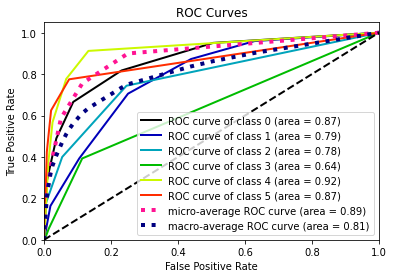

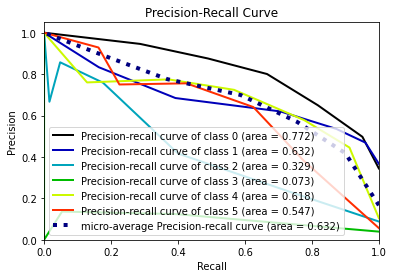

No feature importances function in model
DecisionTreeClassifier: 
Train score: 0.9938217122683142
Test score: 0.5405786873676782


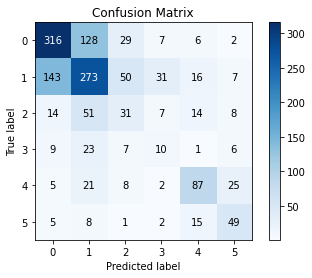

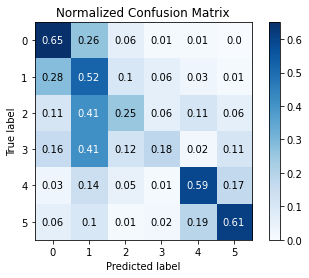

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       488
           1       0.54      0.53      0.53       520
           2       0.25      0.25      0.25       125
           3       0.17      0.18      0.17        56
           4       0.63      0.59      0.61       148
           5       0.51      0.61      0.55        80

    accuracy                           0.54      1417
   macro avg       0.46      0.47      0.46      1417
weighted avg       0.54      0.54      0.54      1417



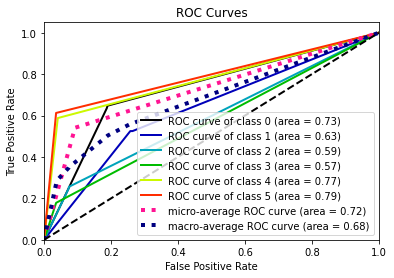

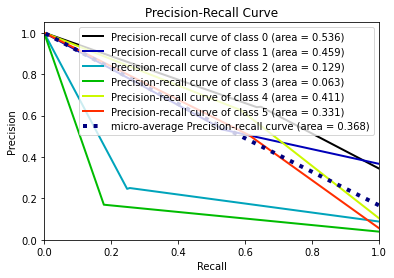

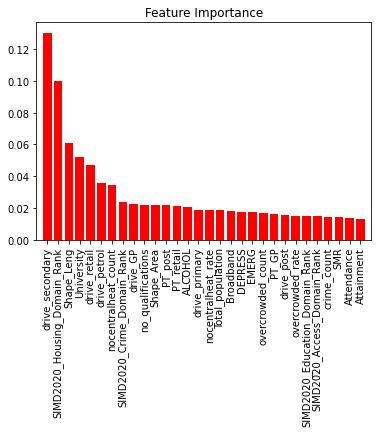

RandomForestClassifier: 
Train score: 0.9938217122683142
Test score: 0.6880733944954128


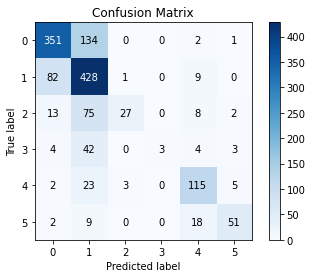

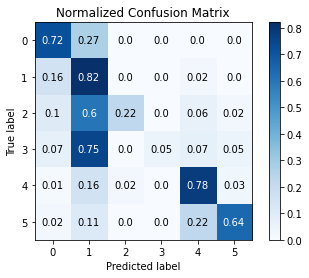

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       488
           1       0.60      0.82      0.70       520
           2       0.87      0.22      0.35       125
           3       1.00      0.05      0.10        56
           4       0.74      0.78      0.76       148
           5       0.82      0.64      0.72        80

    accuracy                           0.69      1417
   macro avg       0.80      0.54      0.56      1417
weighted avg       0.73      0.69      0.67      1417



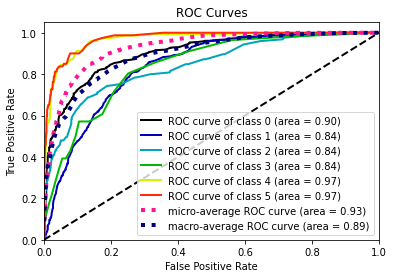

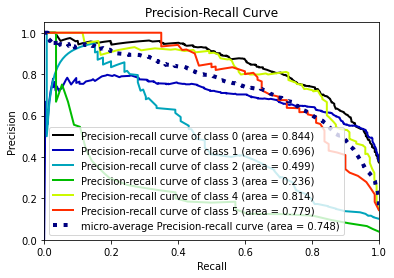

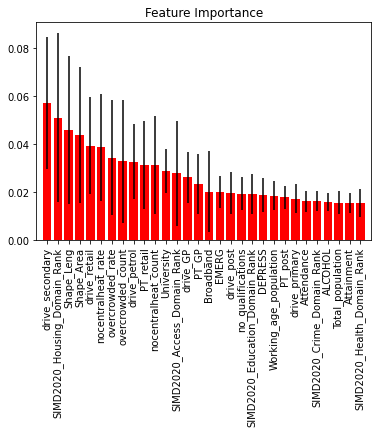

LogisticRegression: 
Train score: 0.6589585172109444
Test score: 0.6690190543401553


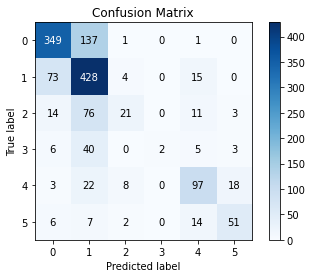

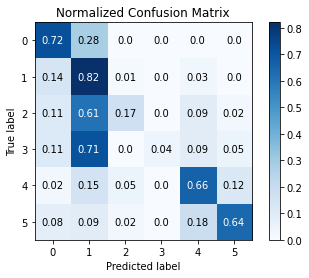

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       488
           1       0.60      0.82      0.70       520
           2       0.58      0.17      0.26       125
           3       1.00      0.04      0.07        56
           4       0.68      0.66      0.67       148
           5       0.68      0.64      0.66        80

    accuracy                           0.67      1417
   macro avg       0.72      0.51      0.52      1417
weighted avg       0.69      0.67      0.64      1417



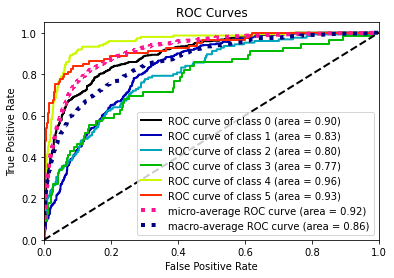

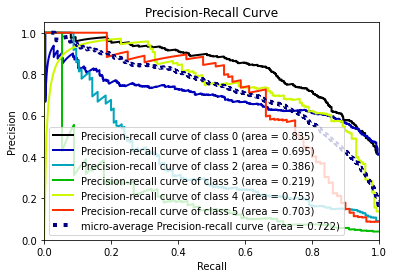

No feature importances function in model
XGBClassifier: 
Train score: 0.9936451897616946
Test score: 0.7057163020465773


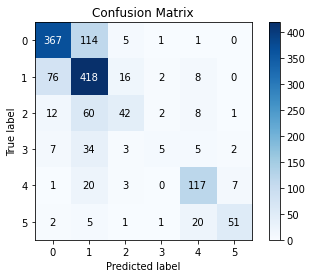

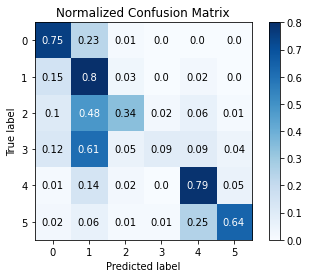

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       488
           1       0.64      0.80      0.71       520
           2       0.60      0.34      0.43       125
           3       0.45      0.09      0.15        56
           4       0.74      0.79      0.76       148
           5       0.84      0.64      0.72        80

    accuracy                           0.71      1417
   macro avg       0.68      0.57      0.59      1417
weighted avg       0.70      0.71      0.69      1417



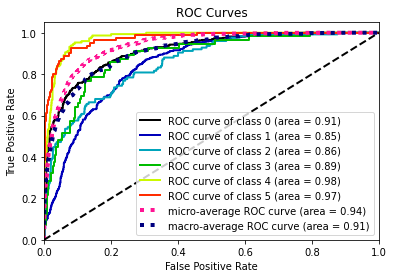

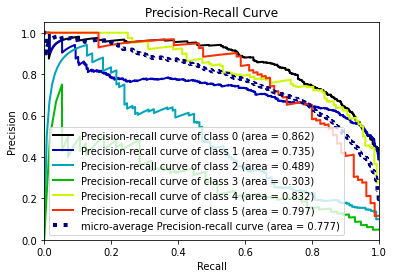

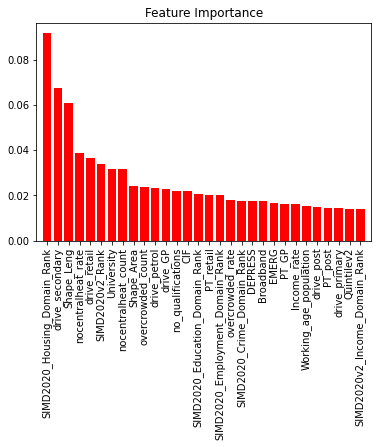

MLPClassifier: 
Train score: 0.7957634598411297
Test score: 0.707833450952717


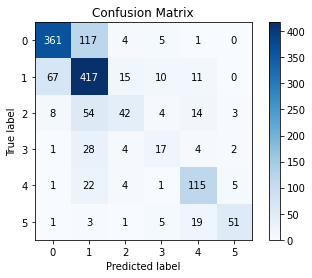

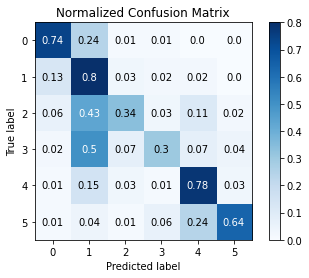

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       488
           1       0.65      0.80      0.72       520
           2       0.60      0.34      0.43       125
           3       0.40      0.30      0.35        56
           4       0.70      0.78      0.74       148
           5       0.84      0.64      0.72        80

    accuracy                           0.71      1417
   macro avg       0.67      0.60      0.62      1417
weighted avg       0.71      0.71      0.70      1417



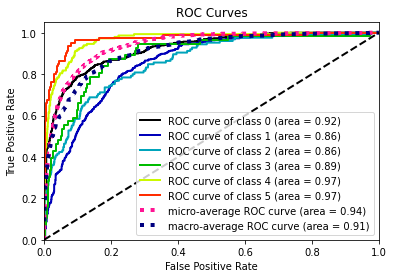

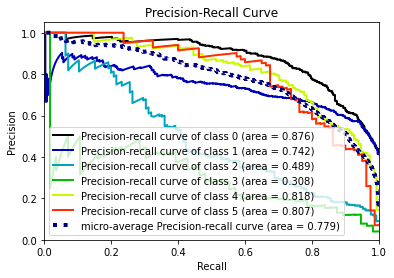

No feature importances function in model


In [25]:
# Run for test train split. Quicker and figures are pretty close to mean kfold.

def multimodel():
    for name,curr_model in models :
        print (name)
        curr_model.fit(X_train, y_train)
        print('Train score:', curr_model.score(X_train, y_train))
        print('Test score:', curr_model.score(X_test, y_test))
    
        y_pred = curr_model.predict(X_test)
        skplt.metrics.plot_confusion_matrix(y_test, y_pred)
        plt.show()
        skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
        plt.show()
        print(classification_report(y_test, y_pred))
    
        y_probas = curr_model.predict_proba(X_test)
        skplt.metrics.plot_roc(y_test, y_probas)
        plt.show()
        skplt.metrics.plot_precision_recall(y_test, y_probas)
        plt.show()
        try:
            skplt.estimators.plot_feature_importances(curr_model, feature_names=cols, x_tick_rotation = 90, max_num_features = 30)
            plt.show()
        except:
            print("No feature importances function in model") 
        
        
        
multimodel()

On reflection the model may be picking up geographic info to classify rural areas. This feels a bit like cheating. Removing Access domain features and final rank (that would include some info from the access domain rank.) Leaving in overcrowding as rural area may still have pockets of high density, will that fool the model?  
Also removing geographic features, they corrilate relativly highly, rural areas persumably being a good bit bigger than urban.

In [26]:
dropped_cols = ['SIMD2020v2_Rank', 'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'drive_petrol', 'drive_GP', 'drive_post', 'drive_primary','drive_retail', 'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail', 'Shape_Leng', 'Shape_Area']

X = X.drop(dropped_cols, axis=1)
X_test = X_test.drop(dropped_cols, axis=1)
X_train = X_train.drop(dropped_cols, axis=1)

CatBoostClassifier: 
Train score: 0.9733451015004413
Test score: 0.634438955539873


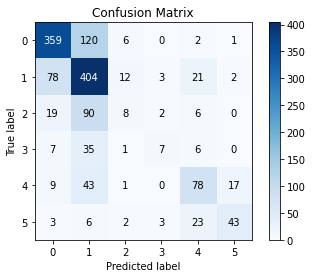

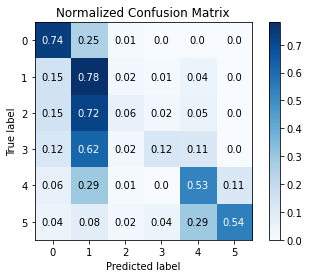

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       488
           1       0.58      0.78      0.66       520
           2       0.27      0.06      0.10       125
           3       0.47      0.12      0.20        56
           4       0.57      0.53      0.55       148
           5       0.68      0.54      0.60        80

    accuracy                           0.63      1417
   macro avg       0.55      0.46      0.48      1417
weighted avg       0.61      0.63      0.61      1417



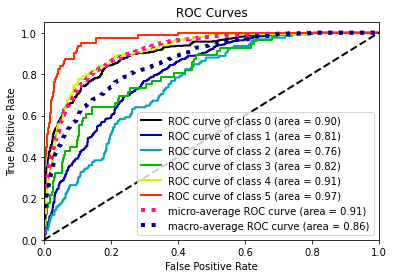

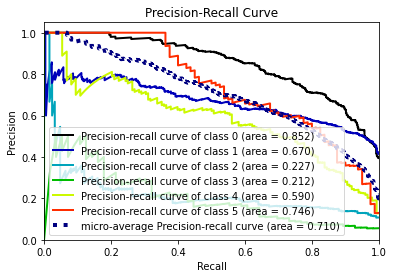

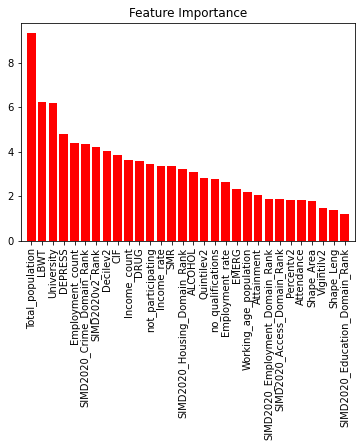

KNeighborsClassifier: 
Train score: 0.6849073256840247
Test score: 0.5751587861679605


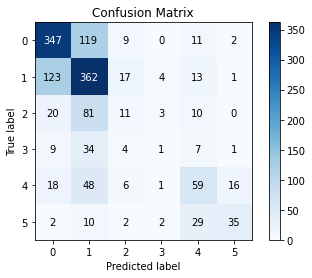

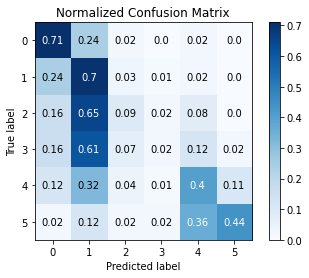

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       488
           1       0.55      0.70      0.62       520
           2       0.22      0.09      0.13       125
           3       0.09      0.02      0.03        56
           4       0.46      0.40      0.43       148
           5       0.64      0.44      0.52        80

    accuracy                           0.58      1417
   macro avg       0.44      0.39      0.40      1417
weighted avg       0.54      0.58      0.55      1417



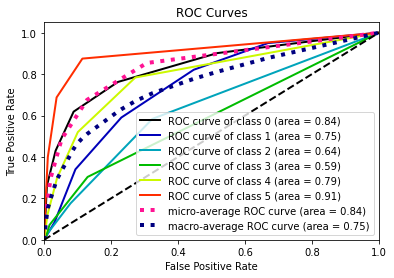

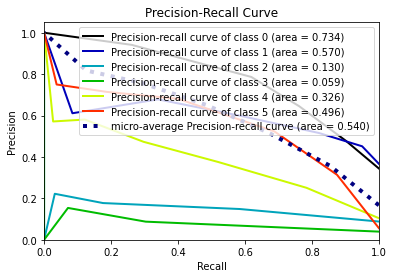

No feature importances function in model
DecisionTreeClassifier: 
Train score: 0.9938217122683142
Test score: 0.4954128440366973


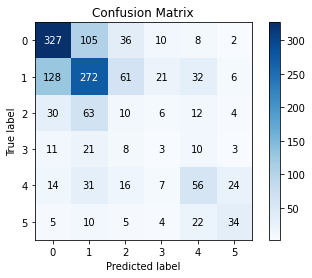

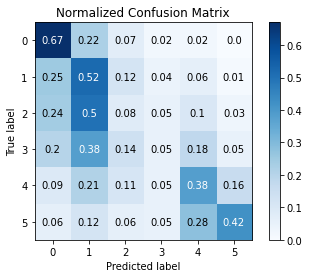

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       488
           1       0.54      0.52      0.53       520
           2       0.07      0.08      0.08       125
           3       0.06      0.05      0.06        56
           4       0.40      0.38      0.39       148
           5       0.47      0.42      0.44        80

    accuracy                           0.50      1417
   macro avg       0.36      0.36      0.36      1417
weighted avg       0.49      0.50      0.49      1417



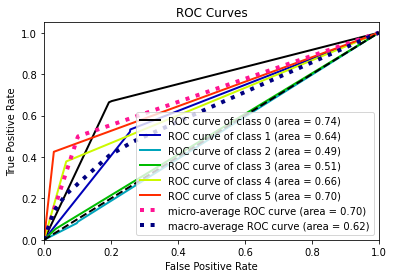

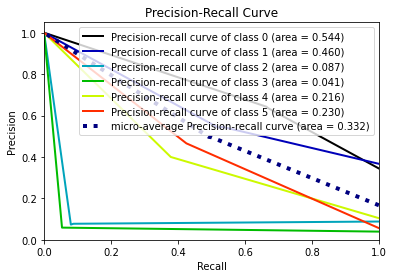

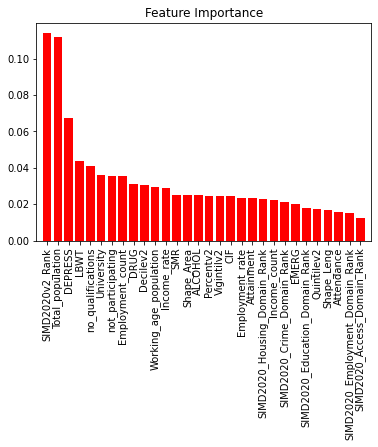

RandomForestClassifier: 
Train score: 0.9938217122683142
Test score: 0.6287932251235003


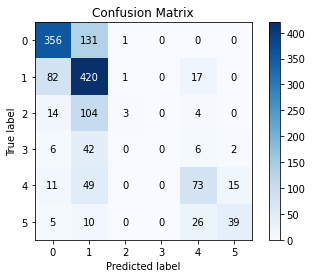

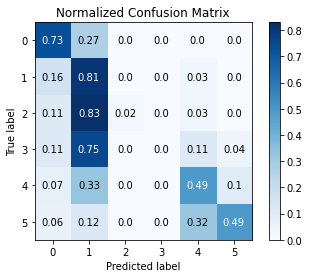

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       488
           1       0.56      0.81      0.66       520
           2       0.60      0.02      0.05       125
           3       0.00      0.00      0.00        56
           4       0.58      0.49      0.53       148
           5       0.70      0.49      0.57        80

    accuracy                           0.63      1417
   macro avg       0.53      0.42      0.43      1417
weighted avg       0.62      0.63      0.59      1417



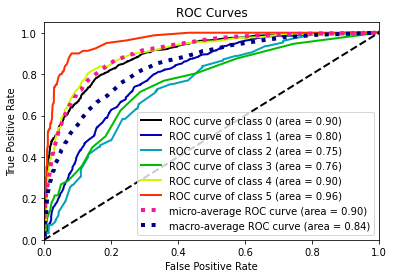

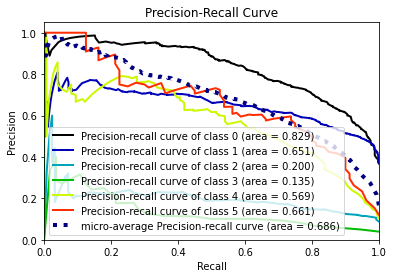

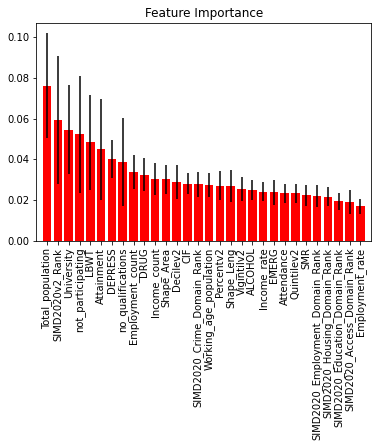

LogisticRegression: 
Train score: 0.6381288614298323
Test score: 0.6330275229357798


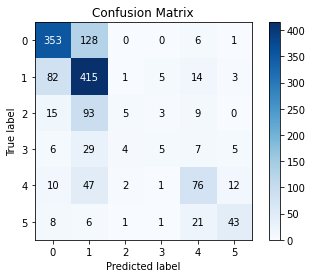

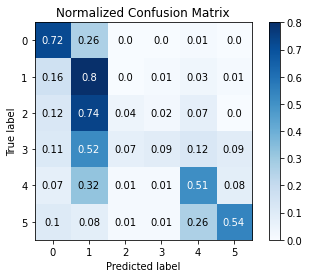

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       488
           1       0.58      0.80      0.67       520
           2       0.38      0.04      0.07       125
           3       0.33      0.09      0.14        56
           4       0.57      0.51      0.54       148
           5       0.67      0.54      0.60        80

    accuracy                           0.63      1417
   macro avg       0.55      0.45      0.46      1417
weighted avg       0.61      0.63      0.60      1417



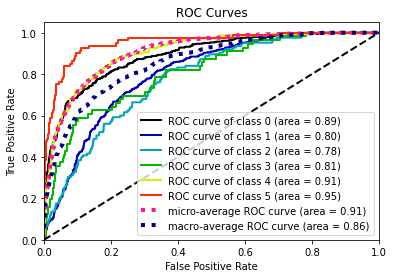

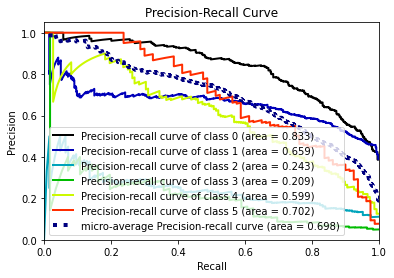

No feature importances function in model
XGBClassifier: 
Train score: 0.9932921447484554
Test score: 0.6365561044460127


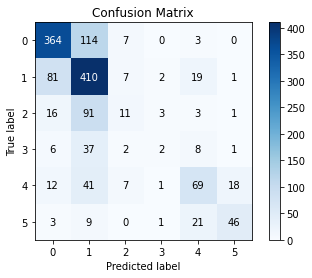

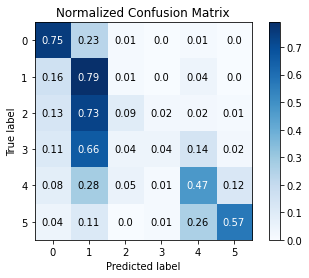

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       488
           1       0.58      0.79      0.67       520
           2       0.32      0.09      0.14       125
           3       0.22      0.04      0.06        56
           4       0.56      0.47      0.51       148
           5       0.69      0.57      0.63        80

    accuracy                           0.64      1417
   macro avg       0.52      0.45      0.46      1417
weighted avg       0.61      0.64      0.61      1417



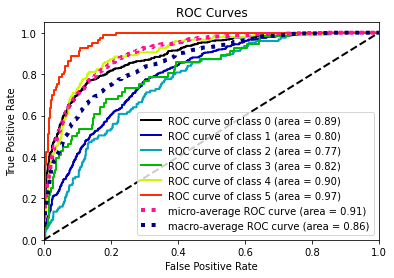

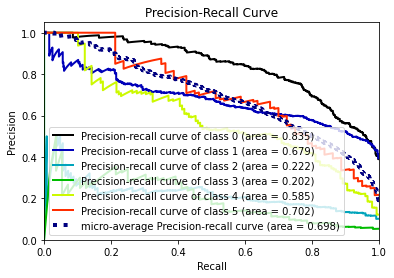

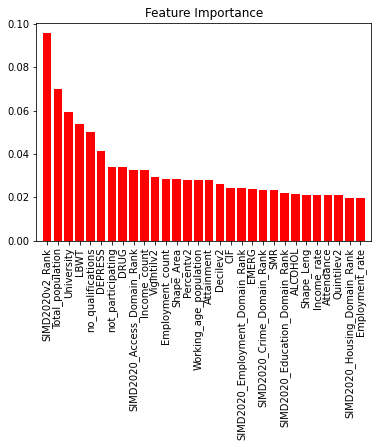

MLPClassifier: 
Train score: 0.8045895851721094
Test score: 0.6132674664784756


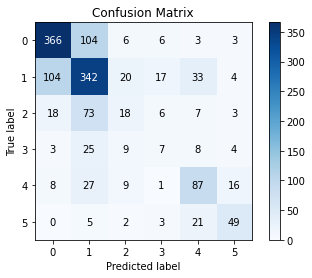

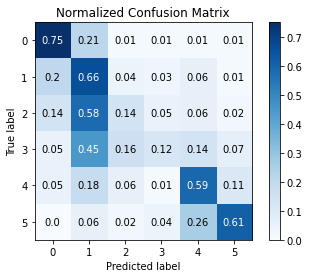

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       488
           1       0.59      0.66      0.62       520
           2       0.28      0.14      0.19       125
           3       0.17      0.12      0.15        56
           4       0.55      0.59      0.57       148
           5       0.62      0.61      0.62        80

    accuracy                           0.61      1417
   macro avg       0.49      0.48      0.48      1417
weighted avg       0.59      0.61      0.60      1417



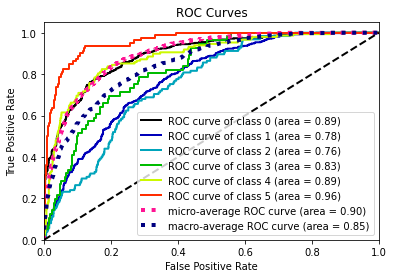

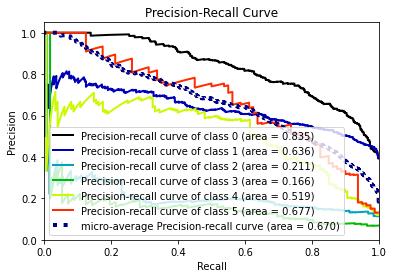

No feature importances function in model


In [27]:
multimodel()

In [28]:
kfoldmodel()

CatBoostClassifier: 
scores: [0.61918195 0.63046544 0.64598025 0.63046544 0.63892807 0.60507757
 0.63046544 0.66572638 0.64598025 0.64598025]
Average score:  0.6358251057827926
KNeighborsClassifier: 
scores: [0.56840621 0.54019746 0.56840621 0.57122708 0.52891396 0.52609309
 0.54724965 0.57545839 0.55571227 0.56699577]
Average score:  0.5548660084626235
DecisionTreeClassifier: 
scores: [0.52891396 0.47531735 0.49083216 0.52186178 0.47390691 0.44851904
 0.48801128 0.50916784 0.49647391 0.45698166]
Average score:  0.48899858956276443
RandomForestClassifier: 
scores: [0.63610719 0.6135402  0.63751763 0.62341326 0.61777151 0.60507757
 0.60789845 0.66008463 0.64174894 0.62200282]
Average score:  0.6265162200282088
LogisticRegression: 
scores: [0.6135402  0.61777151 0.64880113 0.62623413 0.63046544 0.59943583
 0.6022567  0.65726375 0.61918195 0.63328632]
Average score:  0.624823695345557
XGBClassifier: 
scores: [0.62059238 0.60930889 0.62905501 0.62764457 0.61777151 0.61212976
 0.61495063 0.

model  mean score
0      CatBoostClassifier:     0.635825
1    KNeighborsClassifier:     0.554866
2  DecisionTreeClassifier:     0.488999
3  RandomForestClassifier:     0.626516
4      LogisticRegression:     0.624824
5           XGBClassifier:     0.624118
6           MLPClassifier:     0.606629

The diffent models are prioritising different features,  
A voting of bagging classifier might improve results.


In [36]:
voting = VotingClassifier(estimators=[
                                         ('RandomForestClassifier', XGBClassifier()),
                                         ('CatBoostClassifier', RandomForestClassifier())], n_jobs = -1)  

In [37]:
cv = ShuffleSplit(n_splits=10, random_state=0)
pipeline = Pipeline([('scaler', scaler), ('model', voting)])
scores = cross_val_score(pipeline, X, y, cv=cv)
print("scores:", scores)
meanscore = scores.mean()
print("Average score:", meanscore)

[13:20:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:17:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[13:24:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

scores: [0.63751763 0.62764457 0.63892807 0.64174894 0.61777151 0.61636107
 0.60648801 0.66431594 0.64456982 0.64456982]
Average score: 0.6339915373765868
[13:16:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:17:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:16:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:17:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:16:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:17:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:17:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fraz/anaconda3/envs/mlenv/lib/python3.8/site-package

[13:16:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

## Model tuning

In [ ]:
# For autotuning models (not done yet, going to try tuning top two or three methods)

import optuna

def objective(trial):

    param = {
        "use_label_encoder": "False",
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    return (1-accuracy)


if __name__ == '__main__':

    study = optuna.create_study()
    study.optimize(objective, n_trials=50)


    print(study.best_params)
    print(study.best_value)
    print(study.best_trial) 

## Deep learning  

MLPClassifier performed quite well out the box. A taylored nerual network could make the best model. Alsthought the sklearn deep learning is slow, as GPU can be used for keras which considerably speeds things up. but requires a bit more work. I will return to this,

In [ ]:
import tensorflow as tf
from tensorflow import keras # nn modeling
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [ ]:
#One hot encoding output
# Onehot encoding position and agent, day and month
to1hot = ['position', 'agent', 'hour', 'day', 'week']
y_test = pd.get_dummies(y_test)
y_train = pd.get_dummies(y_train)

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_valid = X_test
y_valid = y_test

In [ ]:
y_test

In [ ]:
input_shapeA = [X_train.shape[1]]

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shapeA),
#    layers.GaussianNoise(stddev=0.1), # Bit of noise added to make model less likly to overfit.
    layers.BatchNormalization(),
#    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(6, activation='softmax'),
])

model.summary()
#Overfitting not an issuse at all at the moment

In [ ]:
plot_model(
    model, 
    to_file='baseline.png', 
    show_shapes=True,
    show_layer_names=True
)

In [ ]:
# Dynamic learning rate, will tweak but just using adam with default at the moment
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=50,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
def baseline_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shapeA),
        #layers.GaussianNoise(stddev=0.1), # Bit of noise added to make model less likly to overfit.
        layers.BatchNormalization(),
        #layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(6, activation='softmax')
    ])
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = keras.wrappers.scikit_learn.KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=300,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=5,
    epochs=20,
    callbacks=[early_stopping],
)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
preds = model.predict(X_valid)
preds

## Running predictive model on full dataset

In [ ]:
cols = X.columns
cols

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X[cols] = scaler.fit_transform(X[cols])

In [ ]:
# Dropping same columns as before, unable to change geography with policy. Rural broadband and transport initiatives would directly impact the service rank.

X = X.drop(dropped_cols,axis=1)

In [ ]:
# CatBoostClassifier seems one of the best performing classifiers, at least before tuning.

model = CatBoostClassifier(verbose=0)

print(model.fit(X, y))
print(model.score(X, y))
print(model.score(X, y))
    
y_pred = model.predict(X)
#print(y_pred)
skplt.metrics.plot_confusion_matrix(y, y_pred)
plt.show()
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True)
plt.show()
print(classification_report(y, y_pred))
    
y_probas = curr_model.predict_proba(X)
skplt.metrics.plot_roc(y, y_probas)
plt.show()
skplt.metrics.plot_precision_recall(y, y_probas)
plt.show()

In [ ]:
# Adding predictions back to dataset
SIMD_rural_full_noNans["Predicted Rank"] = y_pred + 1 # Need to add that one back on
SIMD_rural_full_noNans["Difference"] = SIMD_rural_full_noNans["Rank_2016"] - SIMD_rural_full_noNans["Predicted Rank"]

If difference is poistive then the area is more urban than expected.  
If difference is negative then the area is more rural than expected.

In [ ]:
plt.scatter(SIMD_rural_full_noNans['Rank_2016'], SIMD_rural_full_noNans['Difference'])

In [ ]:
ax = SIMD_rural_full_noNans.plot('Difference', figsize=(30, 30), legend=True)
ax.add_artist(ScaleBar(1))

In [ ]:
SIMD_rural_full_noNans["Difference"].hist(bins = 11)
plt.show()

In [ ]:
wrongdf = SIMD_rural_full_noNans.loc[SIMD_rural_full_noNans['Difference'] != 0]

wrongdf["Difference"].hist(bins = 11)
plt.show()

In [ ]:
wrongby5df = SIMD_rural_full_noNans.loc[SIMD_rural_full_noNans['Difference'].abs() >= 5]

In [ ]:
wrongby5df.sort_values('SIMD2020v2_Rank')

### Out by 5 ranks

Coupar Angus and Meigle - 02
Greater Lochgilphead - 01

In [ ]:
wrongby4df = SIMD_rural_full_noNans.loc[SIMD_rural_full_noNans['Difference'].abs() >= 4]
wrongby4df.sort_values('SIMD2020v2_Rank')

In [ ]:
wrongby3df = SIMD_rural_full_noNans.loc[SIMD_rural_full_noNans['Difference'].abs() >= 3]
wrongby3df.sort_values('SIMD2020v2_Rank')

In [ ]:
wrongby2df = SIMD_rural_full_noNans.loc[SIMD_rural_full_noNans['Difference'].abs() >= 2]
wrongby2df.sort_values('SIMD2020v2_Rank')

In [ ]:
wrongby2df.columns

In [ ]:
df = pd.DataFrame(wrongby2df.drop(columns='geometry'))

import sweetviz as sv
sv_report = sv.analyze(df)
sv_report.show_notebook()

## Clustering  
  
See if the same placed are found to not cluster well.

In [ ]:
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))
random_state=20

X = SIMD_rural.values

In [ ]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.cluster import KMeans


kmeans = KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 20))
plt.show()